# Example Data Fitting

Data Fitting Example file based on noisy data.

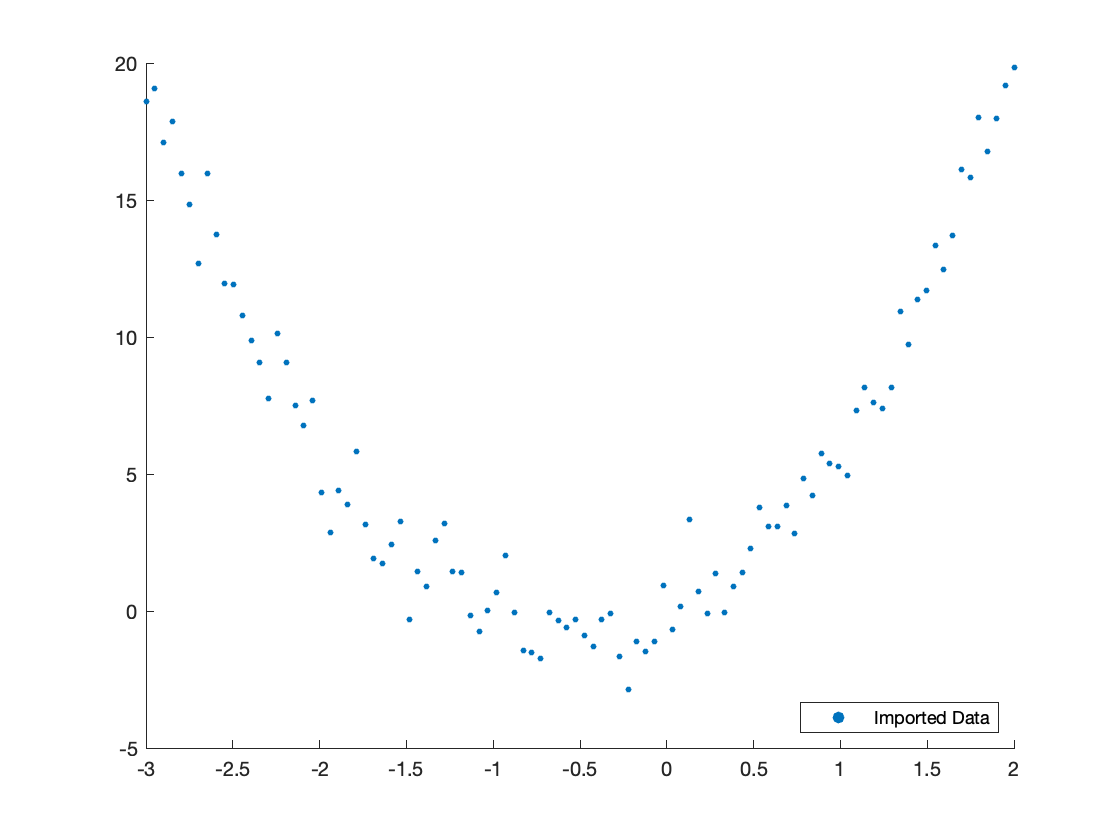

In [12]:
table = readtable("sample_data.xlsx");
x = table.x;
data = table.data;
scatter(x, data, 10, "filled") 
legend({"Imported Data"}, 'Location', 'southeast')

We know that the data is in the following form:

\begin{equation}
y = bx^2+bx+\eta
\end{equation}

Where `b` is the parameter we want to find, and `η` represents the noise in the data. For now, let's ignore the noise.

Let's try checking a range for `b` in \[2,4) in steps of 0.25. We use this range since it seems that as you go about 2 units away from the function's vertex (around `-0.5`), the function seems to about triple.

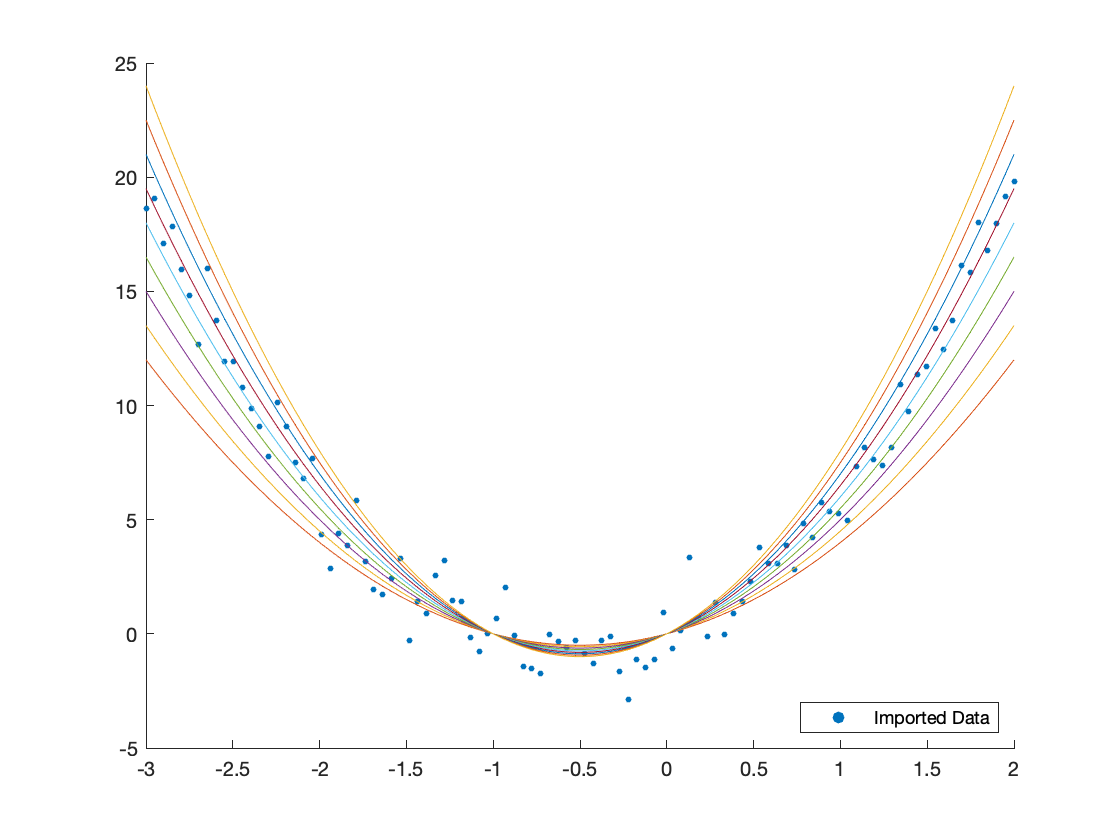

In [13]:
b = 2:.25:4;
scatter(x, data, 10, "filled")
hold on
plot(x, b.*(x).^2 + b.*x)
legend({"Imported Data"}, 'Location', 'southeast')

It appears that the line 4th from the top seems closest to the data (maroon line). That value is 3.25, so let's get more precise and check the errors of 1000 values of `b` from \[3,3.5\].

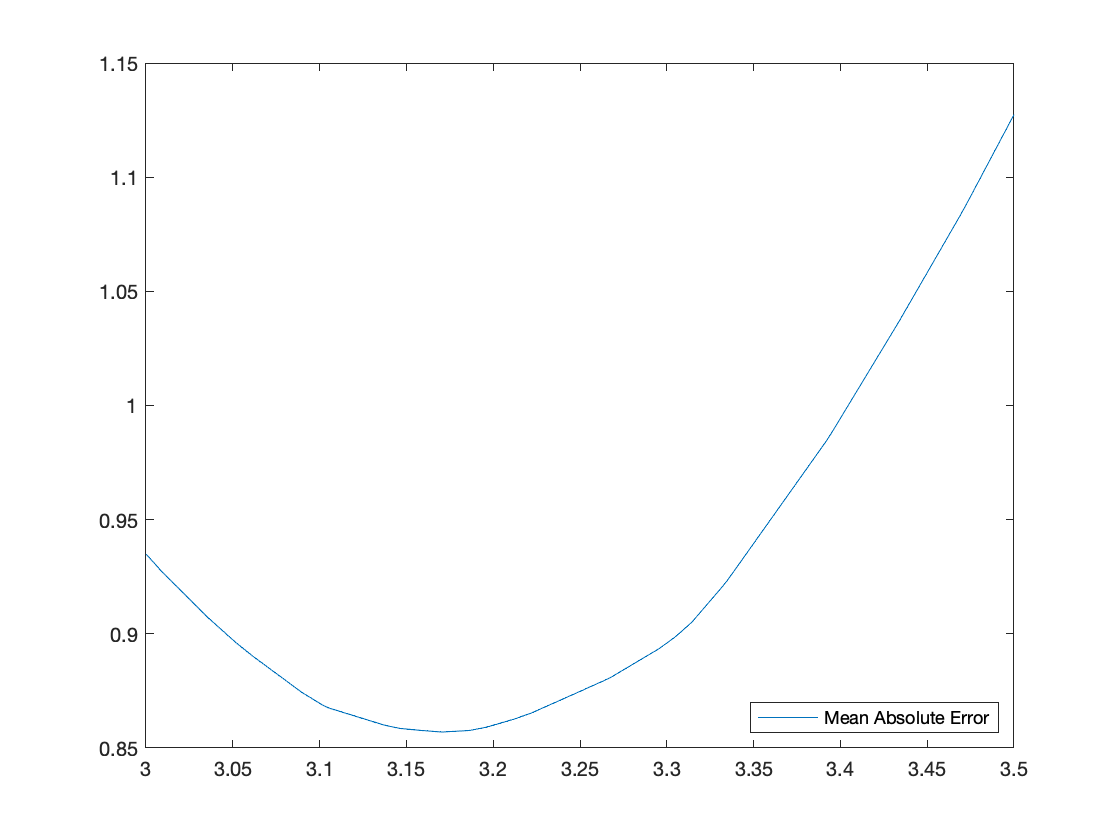

In [14]:
b = linspace(3, 3.5, 1000);
error = sum(abs(b.*(x).^2 + b.*x - data)) ./ length(x);
plot(b, error)
legend({"Mean Absolute Error"}, 'Location', 'southeast')

It seems our minimum is between (3.15, 3.2). We can use the `min` function and then find the exact value of `b` (to four decimal places) that has the lowest error.

In [15]:
m = min(error);
b = b(find(error==m))

b = 
   3.1707

`b=3.1707` seems to be the element with the least error, so let's try that.

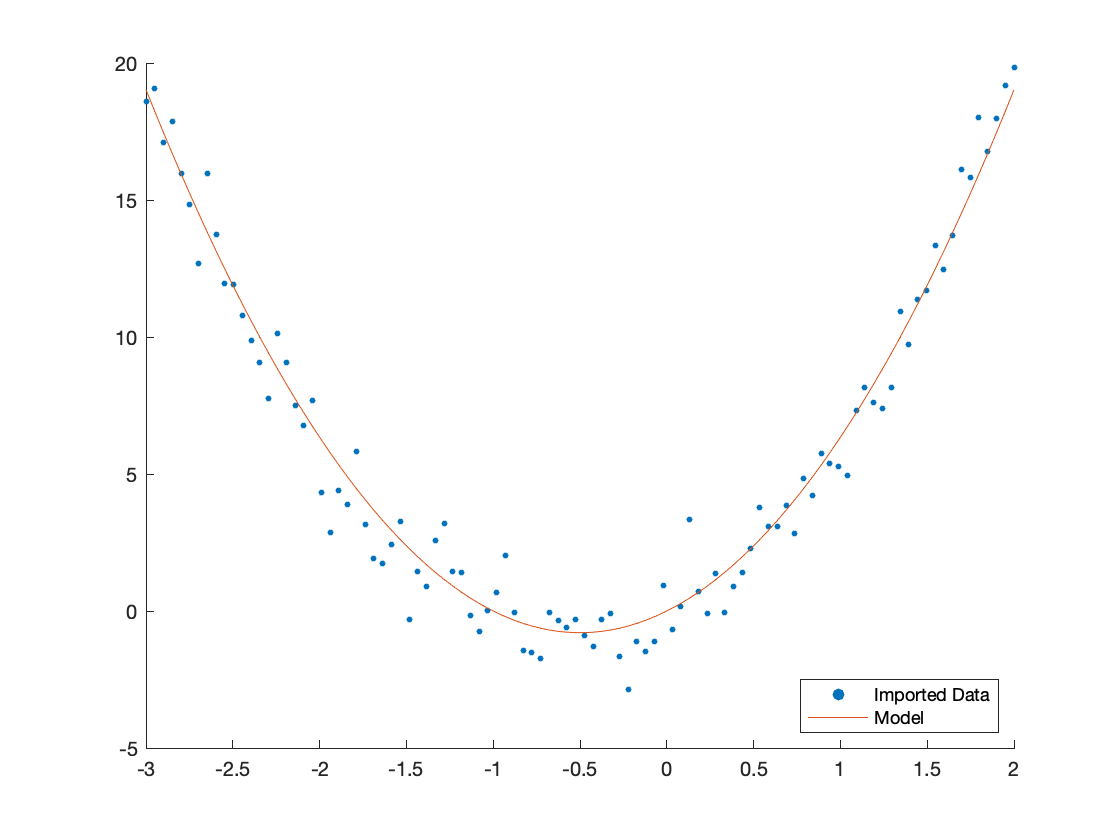

In [16]:
scatter(x, data, 10, "filled")
hold on
plot(x, b.*(x).^2 + b.*x)
legend({"Imported Data", "Model"}, 'Location', 'southeast')

This seems to be a good model, so now let's try to deal with the noise. The noise is shown to be some static constant, but realistically, noise will be both above and below the true funciton value. Therefore it is more accurate to say something like:

\begin{equation}
y = bx^2+bx+\eta\left(x\right)
\end{equation}

Where:

\begin{equation}
\eta\left(x\right) = r
\end{equation}

where `r` is a random variable between some `[-x,x)` (in this following example its [-1,1)

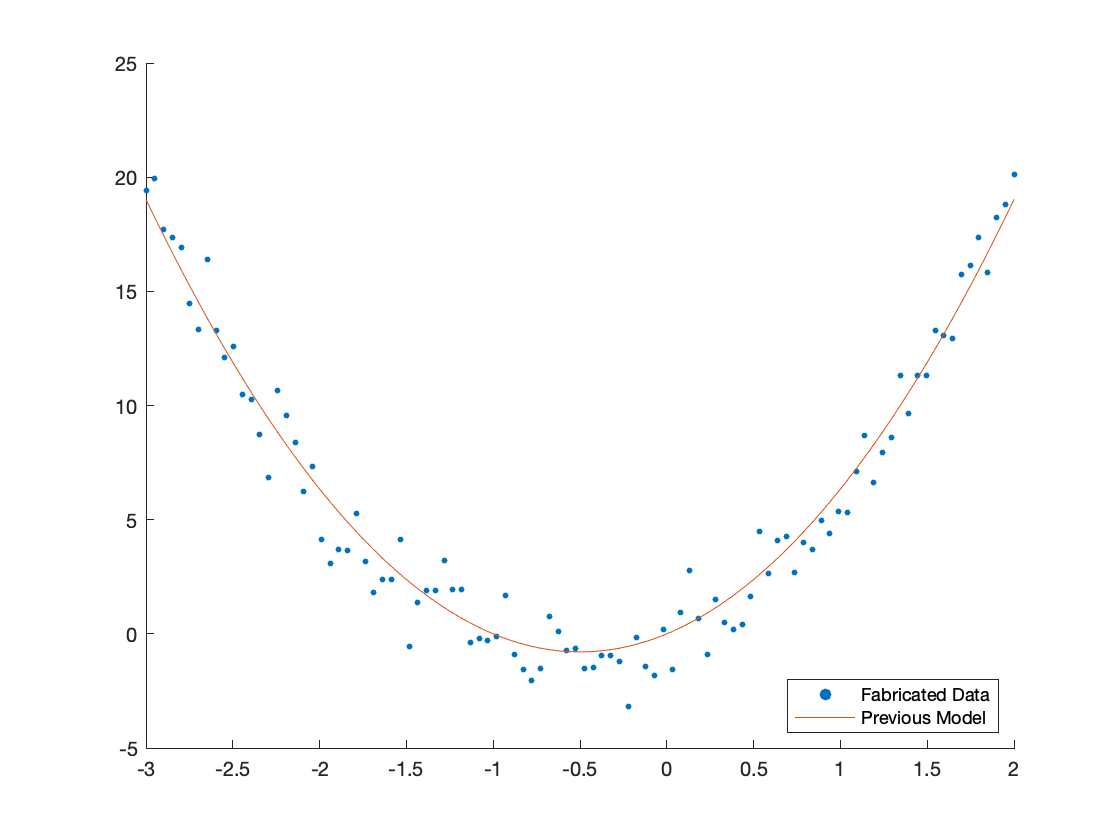

In [17]:
data_fitted = b.*(x).^2 + b.*x;
data_noise = data;
for i = 1:length(x)
    data_noise(i) = data_noise(i) + ((rand-.5)*2);
end
scatter(x, data_noise, 10, "filled")
hold on
plot(x, b.*(x).^2 + b.*x)
hold off
legend({"Fabricated Data", "Previous Model"}, 'Location', 'southeast')

And this data has random noise, but is not the same as the given data, thus proving that it is a method to generate random noise. 

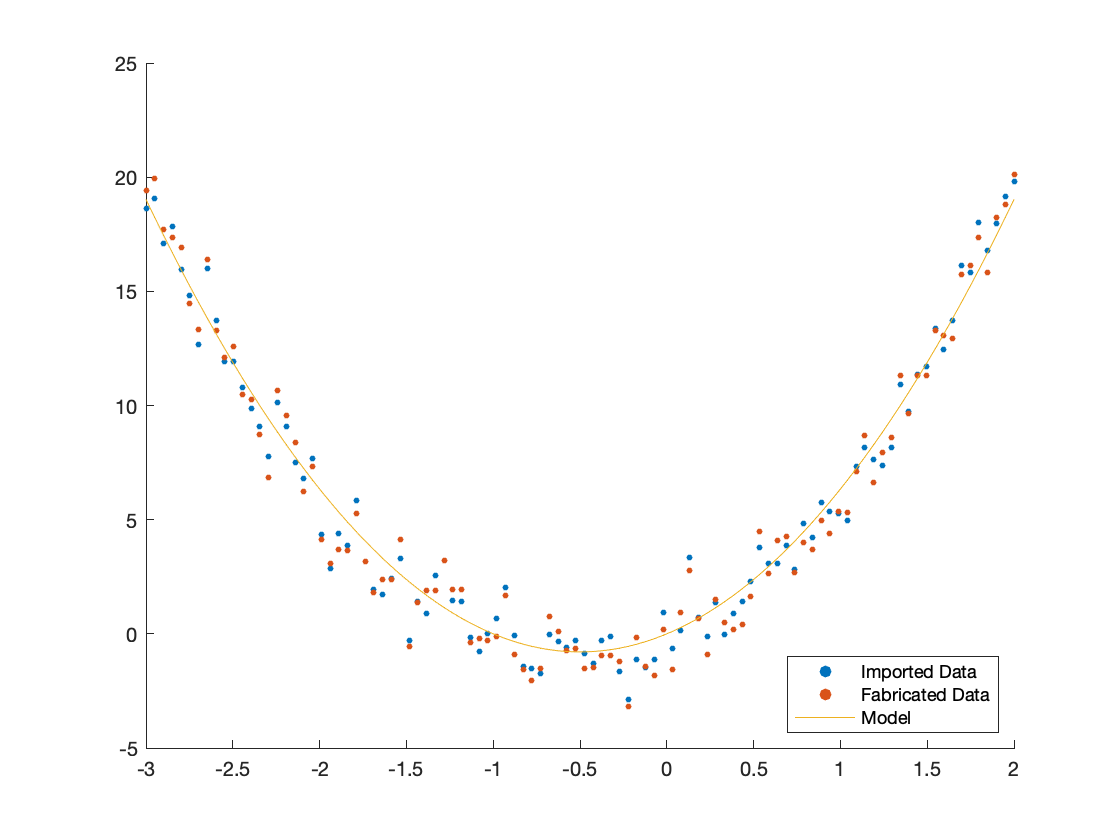

In [18]:
scatter(x, data, 10, "filled") 
hold on 
scatter(x, data_noise, 10, "filled")
plot(x, b.*(x).^2 + b.*x)
hold off
legend({"Imported Data", "Fabricated Data", "Model"}, 'Location', 'southeast')

This fabricated data is really double the noise since the original data already had noise. But if you started with the pure quadratic, you could use this method to create the noise found in the imported data plot. For example:

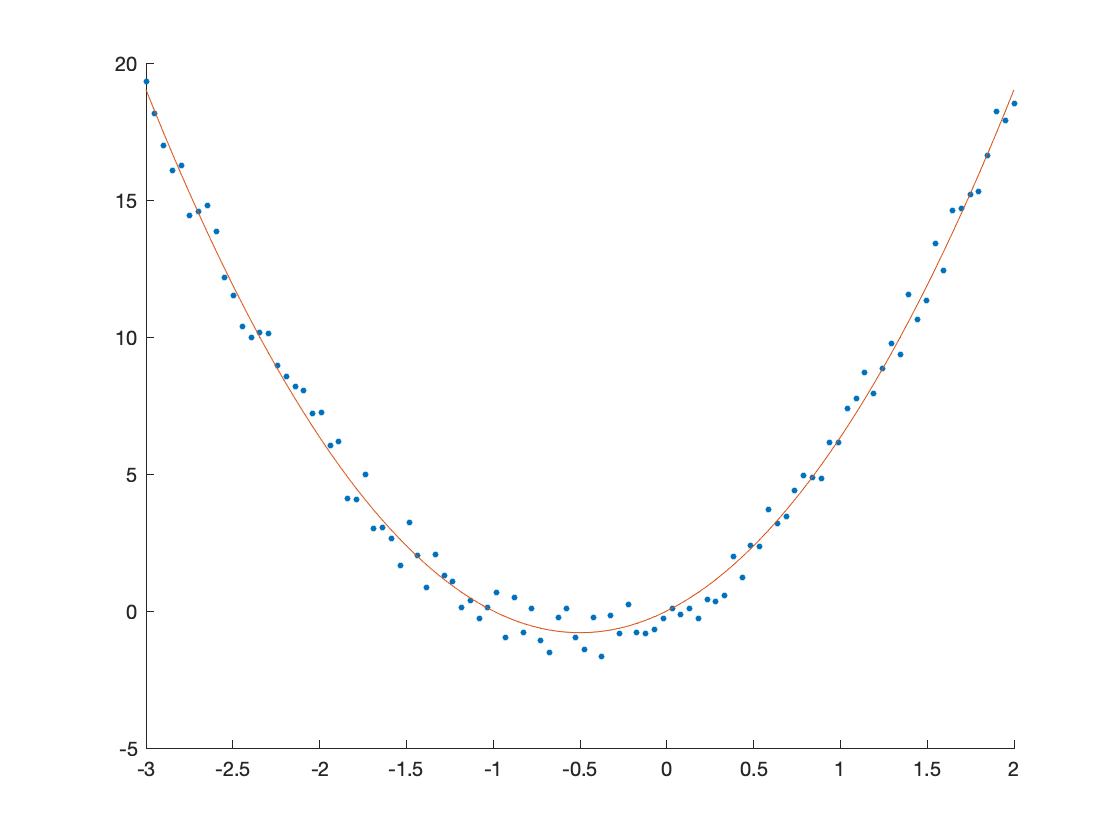

In [19]:
data_true = b.*(x).^2 + b.*x;
data_modified = data_true;
for i = 1:length(x)
    data_modified(i) = data_modified(i) + ((rand-.5)*2);
end
scatter(x, data_modified, 10, "filled")
hold on
plot(x, data_true)
hold off

By editing the line `(rand-.5)*2)`, you can get a larger or smaller spread (i.e. \[-2.5, 2.5)):

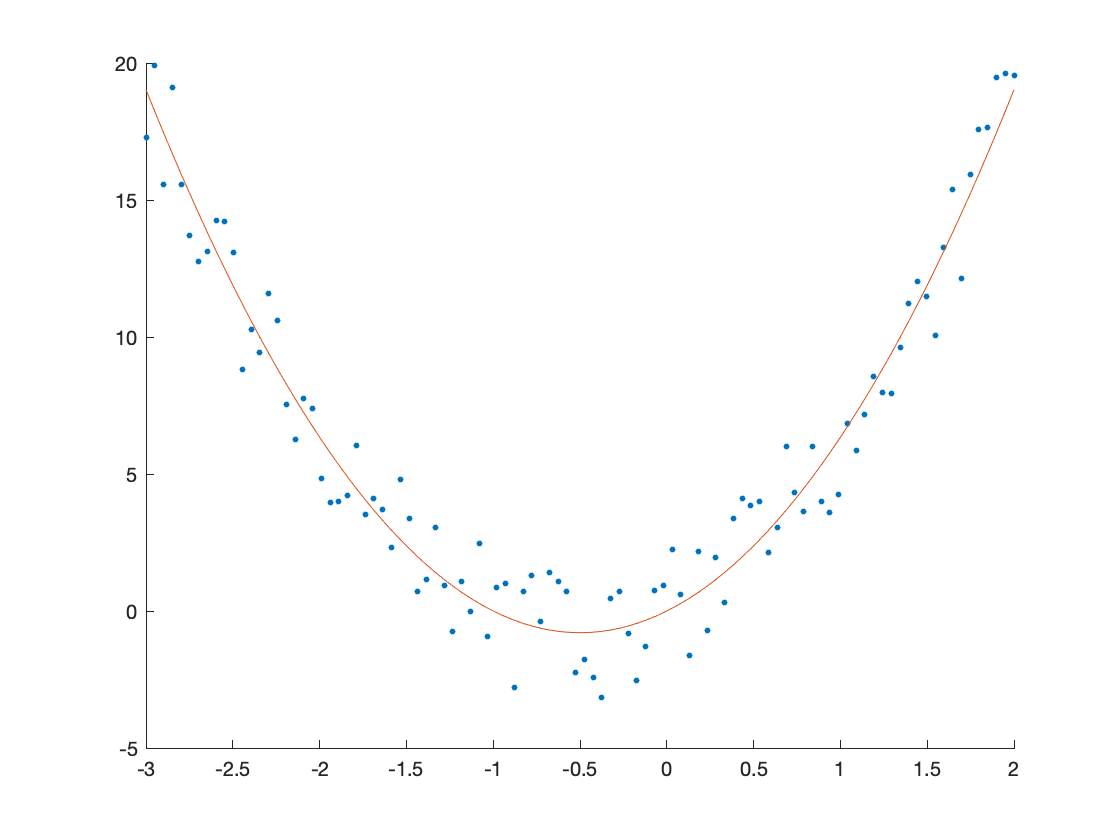

In [20]:
data_modified = data_true;
for i = 1:length(x)
    data_modified(i) = data_modified(i) + ((rand-.5)*5);
end
scatter(x, data_modified, 10, "filled")
hold on
plot(x, data_true)
hold off

Asserting that the vertex of `-0.5` (found through taking the derivative) has a negative value.

In [21]:
b*(-.5)^2 + b*(-.5)

ans = 
   -0.7927

It was later asserted that the true value for `b` was `π`. That means our percent error was:

In [22]:
percent_error = abs((b-pi) / pi) * 100

percent_error = 
   0.9256

Or just about 1% error, which is not bad, and can likely be accounted for by the noise of the data and floating point precision errors.